<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Exchange_Rate_Impact_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-45a838d6171e>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=n, freq='M')  # Monthly data


        Date  ExchangeRate     Revenue
0 2023-01-31      1.224836  410.450800
1 2023-02-28      1.217922  430.690969
2 2023-03-31      1.250307  430.630364
3 2023-04-30      1.326458  417.631534
4 2023-05-31      1.314751  431.036749


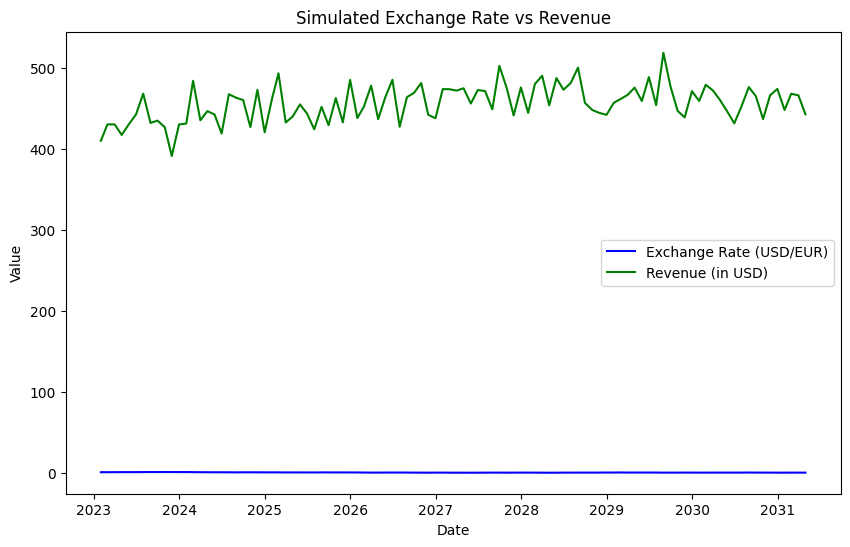

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for simulation
n = 100  # Number of data points
dates = pd.date_range(start='2023-01-01', periods=n, freq='M')  # Monthly data
mean_exchange_rate = 1.2  # Assume average USD/EUR exchange rate of 1.2
exchange_rate_fluctuations = np.random.normal(0, 0.05, size=n)  # Random fluctuations

# Simulating exchange rates
exchange_rate = mean_exchange_rate + np.cumsum(exchange_rate_fluctuations)

# Simulating revenue with some correlation to exchange rate (inverse relation here)
revenue_base = 500  # Base revenue in USD
revenue_fluctuations = np.random.normal(0, 20, size=n)  # Random noise
revenue = revenue_base - 50 * exchange_rate + revenue_fluctuations  # Simulated inverse impact

# Create DataFrame
data = pd.DataFrame({
    'Date': dates,
    'ExchangeRate': exchange_rate,
    'Revenue': revenue
})

# Display first few rows of the simulated data
print(data.head())

# Plot the exchange rate and revenue data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['ExchangeRate'], label='Exchange Rate (USD/EUR)', color='blue')
plt.plot(data['Date'], data['Revenue'], label='Revenue (in USD)', color='green')
plt.title('Simulated Exchange Rate vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Correlation between Exchange Rate and Revenue:
              ExchangeRate   Revenue
ExchangeRate      1.000000 -0.525056
Revenue          -0.525056  1.000000
Regression Coefficient (Impact of Exchange Rate on Revenue): -50.674876601607664
Intercept: 501.039808274277


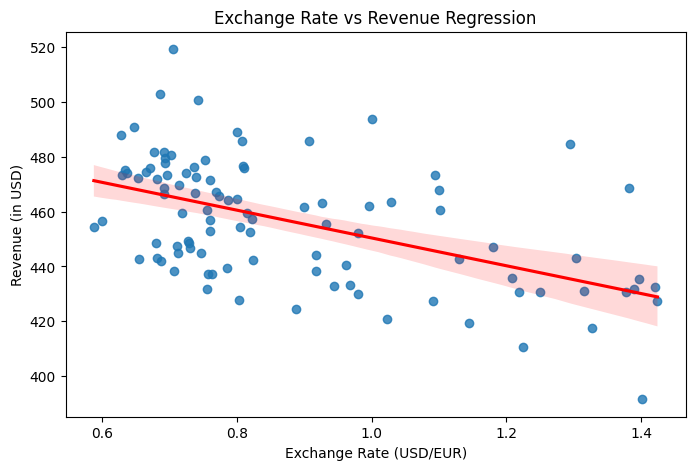

In [2]:
# Correlation analysis
correlation = data[['ExchangeRate', 'Revenue']].corr()
print("Correlation between Exchange Rate and Revenue:")
print(correlation)

# Regression analysis
X = data[['ExchangeRate']]
y = data['Revenue']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Output regression results
print(f"Regression Coefficient (Impact of Exchange Rate on Revenue): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Visualize the regression
plt.figure(figsize=(8, 5))
sns.regplot(x='ExchangeRate', y='Revenue', data=data, line_kws={"color": "red"})
plt.title('Exchange Rate vs Revenue Regression')
plt.xlabel('Exchange Rate (USD/EUR)')
plt.ylabel('Revenue (in USD)')
plt.show()
